# Beverage Sales Data Analysis
## Introduction
The goal of the project is to analyse simulated beverage sales data from Germany. The data contains both business-to-business (B2B) sales and business-to-customer (B2C) sales. However, this project will only analyse B2C sales.

The project will scope, analyse, clean, and plot the data before explaining the findings from the analysis.

**Data Source:**

`synthetic_beverage_sales_data.csv` was sourced from [kaggle.com](https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales).

## Scope
### Project Goals

The goal of this project is to analyse simulated beverage sales data from Germany in order to provide potential businesses, who intend to enter the German beverage market, valuable information and insights into market trends and dynamics. To do this, the project will attempt to provide information on the following questions:

- What is the ideal time of the year for a business to release a new beverage product?
- If a business was to come out with a new beverage product, what type of beverage should this product be?
- What are the most popular products and product categories?

### Data

The dataset `synthetic_beverage_sales_data.csv` is a simulated dataset comprising of eleven columns and nearly nine million rows.

#### Cleaning and Wrangling

Firstly, we should import the modules that we will likely need for this project:

In [5]:
import pandas as pd #Importing to analyse tabular data using DataFrame objects.
import numpy as py #Importing to apply statistical inference for correlations.
import matplotlib.pyplot as plt #Importing to visualise data.
import seaborn as sns #Module built on top of plt. Therefore, using for same purpose.

In order to analysis the data, we can load the data into a `DataFrame` pandas object so that the data can be cleaned, minipulated, and plotted.

In [7]:
all_beverage_sales_data = pd.read_csv("synthetic_beverage_sales_data.csv")

In order to make the data easier to work with, we will make all the column names snake_case.

In [9]:
print("The columns names of the data are:")
for column_name in list(all_beverage_sales_data.columns): #prints the column names of the data one-by-one.
    print(column_name)

The columns names of the data are:
Order_ID
Customer_ID
Customer_Type
Product
Category
Unit_Price
Quantity
Discount
Total_Price
Region
Order_Date


These are all the column names of the data. We only need to turn the column names into lowercase to format the column names in snake_case since there is already an underscore instead of spaces.

In [11]:
old_column_names = list(all_beverage_sales_data.columns) #Stores current column names into a list. 
new_column_names = [column.lower() for column in old_column_names] #Stores new column names into a list.
rename_dict = {}
for i in range(len(old_column_names)): #Loop assigns each old column name as a key to its new column name as its value inside a dictionary.
    rename_dict[old_column_names[i]] = new_column_names[i]
    
all_beverage_sales_data.rename(columns=rename_dict, inplace=True) #Renames the columns.

print("The new columns names of the data are:")
for column_name in list(all_beverage_sales_data.columns): #Prints the new column names out one-by-one.
    print(column_name)

The new columns names of the data are:
order_id
customer_id
customer_type
product
category
unit_price
quantity
discount
total_price
region
order_date


Since we only want to deal with the B2C sales only, we should shrink the data frame so it only contains those B2C observations.

In [13]:
print(all_beverage_sales_data.customer_type.value_counts())
print()
print(f"The data has {str(len(all_beverage_sales_data))} rows")
print()
print(all_beverage_sales_data.info(show_counts="True"))

customer_type
B2C    5795405
B2B    3204505
Name: count, dtype: int64

The data has 8999910 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   order_id       8999910 non-null  object 
 1   customer_id    8999910 non-null  object 
 2   customer_type  8999910 non-null  object 
 3   product        8999910 non-null  object 
 4   category       8999910 non-null  object 
 5   unit_price     8999910 non-null  float64
 6   quantity       8999910 non-null  int64  
 7   discount       8999910 non-null  float64
 8   total_price    8999910 non-null  float64
 9   region         8999910 non-null  object 
 10  order_date     8999910 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB
None


The above information tells us that there are exactly 8,999,910 rows with 5,795,405 B2C rows and 3,204,505 B2B rows. Therefore our shrunken data frame should have 5,795,405 rows representing the B2C data. Moreover, none of the column is missing any data. Therefore, there are no null values. All quantitiative data is as a numeric type, indicating that there is no incorrect data in these categories. We should change the `order_date` variable to a `pd.datetime`. However, we should do this after we create more varaibles, seperating year, month, and day.

In [15]:
beverage_sales = all_beverage_sales_data.loc[all_beverage_sales_data.customer_type == "B2C"].reset_index() #Shrink the data to only include B2C.
beverage_sales.drop(columns=["customer_type", "index", "customer_id", "order_id"], inplace=True) #Delete unesscessary columns from our data.

date_list = beverage_sales.order_date.str.split("-")
i = 0
for unit in ["year", "month", "day"]:
    beverage_sales[unit] = date_list.str.get(i)
    beverage_sales[unit] = pd.to_numeric(beverage_sales[unit])
    i += 1

beverage_sales["order_date"] = pd.to_datetime(beverage_sales["order_date"])

In [16]:
beverage_sales["order_date"] = pd.to_datetime(beverage_sales["order_date"])
print(f"The data is now in the shape of {beverage_sales.shape}")
beverage_sales.head()

The data is now in the shape of (5795405, 11)


,product,category,unit_price,quantity,discount,total_price,region,order_date,year,month,day
0,Sauvignon Blanc,Alcoholic Beverages,9.09,2,0.0,18.18,Schleswig-Holstein,2023-03-16,2023,3,16
1,Mountain Dew,Soft Drinks,0.99,11,0.0,10.89,Bayern,2023-11-05,2023,11,5
2,Vio Wasser,Water,1.61,13,0.0,20.93,Baden-Württemberg,2021-01-12,2021,1,12
3,Rauch Multivitamin,Juices,2.31,7,0.0,16.17,Baden-Württemberg,2021-01-12,2021,1,12
4,Granini Apple,Juices,1.64,2,0.0,3.28,Schleswig-Holstein,2022-12-03,2022,12,3


We now have all the variables that will provide valuable information for our analysis and all the B2C rows in our DataFrame. We should now inspect each column to get a feel for our data.

In [18]:
print(f"There are {beverage_sales["product"].nunique()} different products.")
print(f"The categories of beverages are {beverage_sales.category.unique()}.")
print(f"The data comprises the data of {beverage_sales.region.nunique()} different German regions")
print(f"The data ranges from {beverage_sales.order_date.min()} to {beverage_sales.order_date.max()}")

There are 47 different products.
The categories of beverages are ['Alcoholic Beverages' 'Soft Drinks' 'Water' 'Juices'].
The data comprises the data of 16 different German regions
The data ranges from 2021-01-01 00:00:00 to 2023-12-30 00:00:00


Therefore, we can officially describe our data in the following way:

Rows: 5,795,405 <br />
Columns: 11

**Varaibles:**
- `product` (`str`): Product name of the item ordered.
- `category` (`str`): Category of the product ordered (`Alcoholic Beverages`, `Soft Drinks`, `Water`, or `Juices`).
- `unit_price` (`float`): Price of a single unit of the product ordered.
- `quantity` (`int`): Amount of units of the product in the order.
- `discount` (`float`): Percentage of discount on the product unit price (0 to 1).
- `total price` (`float`): Total amount paid for order (quantity * unit_price * discount).
- `region` (`str`): The region of Germany that the order was placed.
- `order_date` (`pd.datetime`): The whole date of the order.
- `year` (`int`): The year of the order (2021, 2022, 2023).
- `month` (`int`): The month of the order.
- `day` (`int`): The day of the order.

We can now commence with our analysis. We can continue to wrangle our data later if required.

#### Analysis

We will attempt to inspect insights into the questions:

- What are the most popular products and product categories?
- If a business was to come out with a new beverage product, what type of beverage should this product be?

Note that the insights we gain from the first question will assist the insights we gain from the second question.

Since we are going to display the data against the varaible `cateogry`, to maintain consistency of the colours of the different values, we should definge a dictionary that specifies the colour of each `category` value.

In [21]:
category_colors = {
    "Alcoholic Beverages": "Green",
    "Juices": "Orange",
    "Water": "Blue",
    "Soft Drinks": "Red"
}

Since we will want to show aggregate statistics on plots with specific variable values on the x-axis and aggregates on the y-axis. We can create a function that can reshape the `beverage_sales` pd.DataFrame object so that we can do this.

In [23]:
def aggregate_df_by_variables(
    groupby_vars: list, 
    agg_var: str, 
    agg_fun: str,
    dframe=beverage_sales
) -> pd.DataFrame:
    
    """
    Reshapes the beverage_sales DataFrame with groupby and a pandas aggregate function on one of the variables of beverage_sales.

    Inputs:
        groupby_vars: list of str
        agg_var: str
        agg_fun: str
        dframe = beverage_sales: pd.DataFrame

    Returns:
        df (reshaped): pandas.DataFrame
    """
    #Check to see if all the inputs are of the right type.
    #If not, raise an exception.
    inputs = [groupby_vars, agg_var, agg_fun, dframe] 
    input_types = [list, str, str, pd.DataFrame]
    for i in range(len(inputs)):
        if not isinstance(inputs[i], input_types[i]):
            raise TypeError(f"{inputs[i]} is not the correct type. Got {type(inputs[i])}. Should be {input_types[i]}")

    #Create the new DataFrame.
    df = ( 
        dframe
        .groupby(groupby_vars)
        .agg(aggregate=(agg_var, agg_fun))
        .sort_values(by="aggregate", ascending=False) #Sort the DataFrame so that it goes in descending order by the aggragate to make the plots look better.
        .reset_index() #This turns it into a DataFrame object after the groupby method turned it into a Series object.
    )

    #Change the column name of the aggregate variable.
    aggregate_var_name = f"{agg_var}_{agg_fun}"
    df.rename(columns={"aggregate": aggregate_var_name}, inplace=True) 

    return df

Since, we will need to plot multiple bar plots, we should also create a function that makes a nice plot for each bar plot we need by wrapping the seaborn barplot function.

In [96]:
def create_bar_plot(
    title: str,
    df: pd.DataFrame, 
    x_vals: str, 
    y_vals: str,
    size=(12,8),
    hue_vals="category", 
    vertical_labels=False,
    bar_labels=False
) -> None:

    """
    Wraps the sns.barplot function and displays the plot. The function returns nothing.

    Inputs:
        title: str
        df: pd.DataFrame
        x_vals: str
        y_vals: str
        size = (12,8): tuple
        hue_vals = "category": str
        vertical_labels = False: bool
        bar_labels = False: bool

    Returns:
        None
    """

    #Check to see if all the inputs are of the right type.
    #If not, raise an exception.
    inputs = [title, df, x_vals, y_vals, size, hue_vals, vertical_labels, bar_labels] 
    input_types = [str, pd.DataFrame, str, str, tuple, str, bool, bool]
    for i in range(len(inputs)):
        if not isinstance(inputs[i], input_types[i]):
            raise TypeError(f"{inputs[i]} is not the correct type. Got {type(inputs[i])}. Should be {input_types[i]}")

    #Begin plotting the barplot.
    #Initialise the figure and axes.
    plt.figure(figsize=size)
    ax = plt.subplot()

    #Creates the barplot differently depending on how hue_vals is specified. The default values is "category".
    if hue_vals == "category":
        sns.barplot(data=df, x=x_vals, y=y_vals, hue=hue_vals, palette=category_colors)
    else:
        sns.barplot(data=df, x=x_vals, y=y_vals, hue=hue_vals)

    plt.title(title) #Assigns title.

    title_format = lambda string: ( 
        " ".join(string.split("_")).title() #A lambda function that turns snake_case into a Title.
    )

    #Create x and y axes respective labels.
    plt.xlabel(title_format(x_vals))
    plt.ylabel(title_format(y_vals))

    #If vertical_labels = True (default vale is False), rotate the labels and make a bit smaller.
    if vertical_labels:
        plt.xticks(rotation="vertical", fontsize=7)

    #If bar_labels = True (default vale is False), put the respective aggregate on top of the bars.
    if bar_labels:
        for i in range(len(df)):
            ax.bar_label(ax.containers[i])

    #Show then close the figure.
    plt.show()
    plt.clf()

We now have our functions, we can now plot some bar graphs. We will begin with a bar graph plotting the total number of products sold of each individual product. The colours will represent the different categories of products.

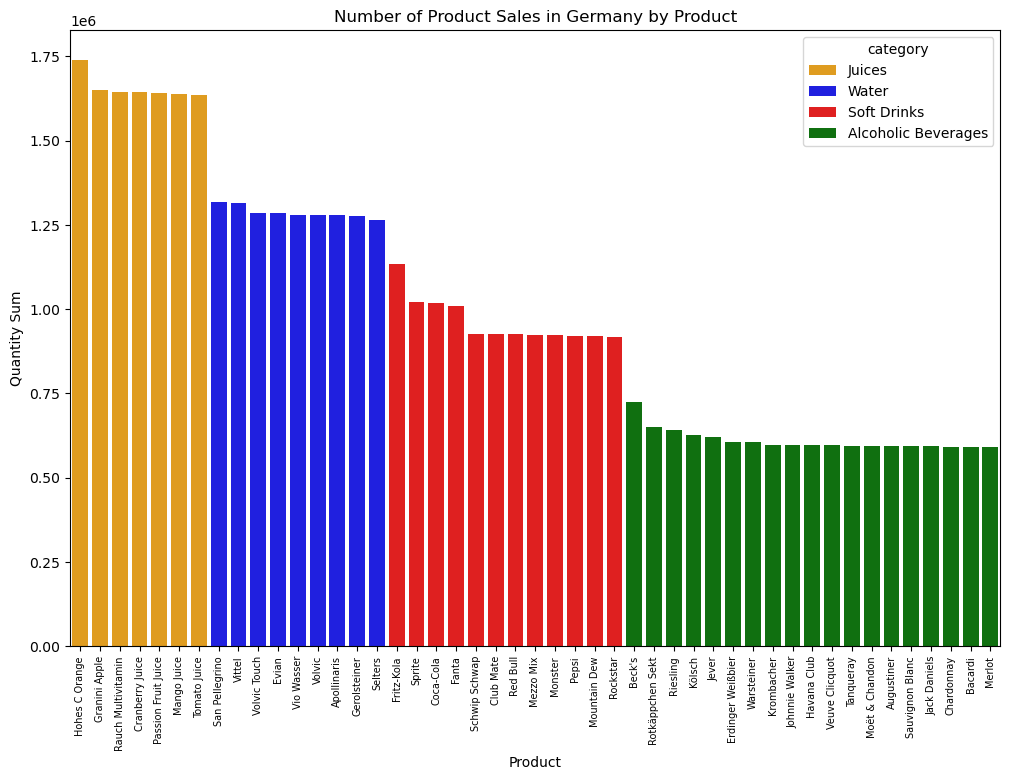

<Figure size 640x480 with 0 Axes>

In [27]:
product_sales = aggregate_df_by_variables(["product", "category"], "quantity", "sum")
create_bar_plot(
    title = "Number of Product Sales in Germany by Product",
    df = product_sales,
    x_vals = "product",
    y_vals = "quantity_sum",
    vertical_labels=True
)

The above figure shows that the best selling product in Germany is 'Hohes C Orange' while the least selling product in Germany is 'Merlot'. Moreover, the figure also shows that juices congregate at the beginning of the figure, indicating that juice is the most sold beverage category in Germany. Alcohol congregates at the end of the figure, indicating that it is the least sold beverage category in Germany. Furthermore, note soda and water are amongst themselves in the middle of the figure.

We can now plot a similar graph that will show the total sales quantities of each product categories.

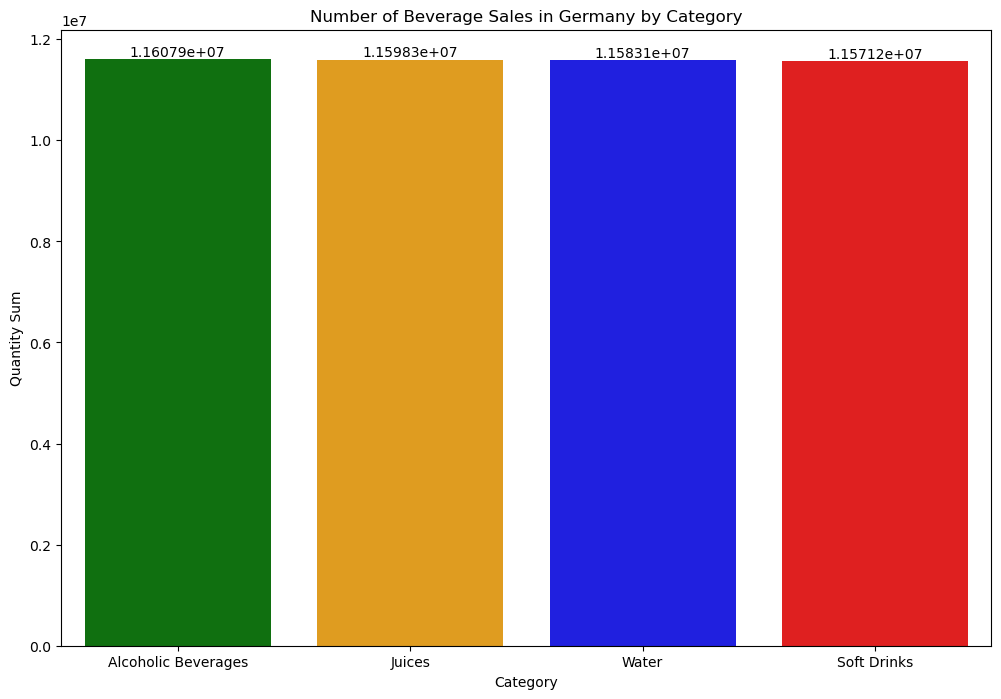

<Figure size 640x480 with 0 Axes>

In [34]:
category_sales = aggregate_df_by_variables(["category"], "quantity", "sum")
create_bar_plot(
    title = "Number of Beverage Sales in Germany by Category",
    df = category_sales,
    x_vals = "category",
    y_vals = "quantity_sum",
    bar_labels=True
)

The above figure shows that all beverage categories sell very similar quantities of beverages. This is suprising considering our "Number of Product Sales in Germany" figure where the individual products in the categories of beverages congregate at specific areas of the figure. Therefore, a possible reason for this could be that there are different amounts of drinks in each category. Let's investigate this now.

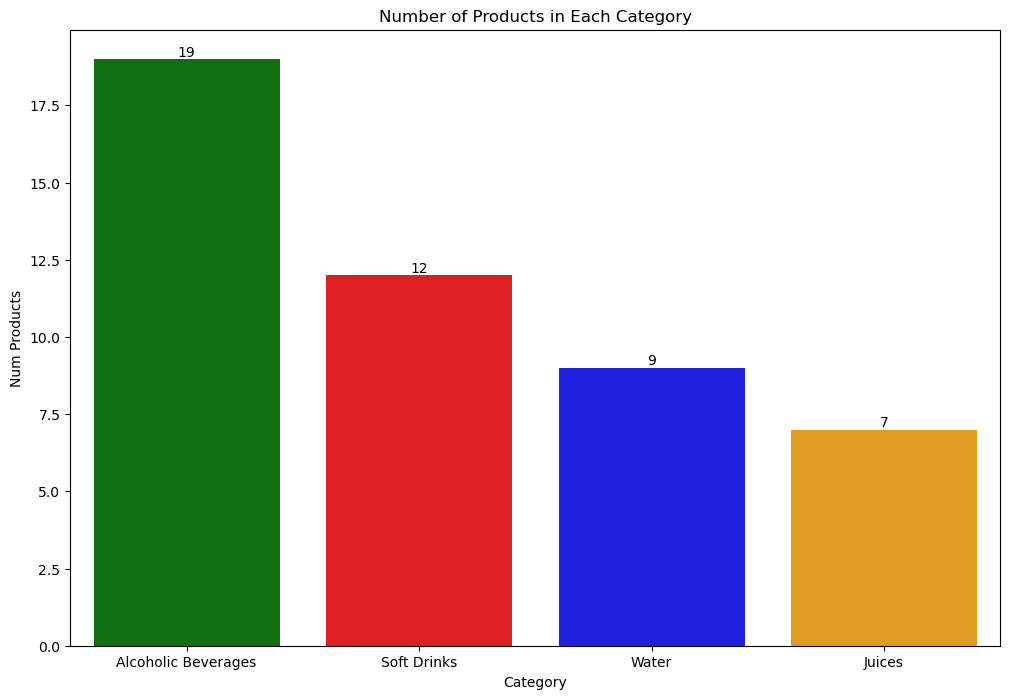

<Figure size 640x480 with 0 Axes>

In [39]:
category_product_num = aggregate_df_by_variables(["category"], "product", "nunique")
category_product_num.rename(columns={"product_nunique": "num_products"}, inplace=True)
create_bar_plot(
    title = "Number of Products in Each Category",
    df = category_product_num,
    x_vals = "category",
    y_vals = "num_products",
    bar_labels = True
)

Therefore, the figure shows us that the reason individual juices get sold the most is because it is the least competitive market. While the oppisite is true for alcohol beverages. Therefore, if a business wanted to get the most sales on a new beverage product, the business should make that new product a juice. However, does that mean you would make the most money off an individual juice product. We will attempt to investigate this now. Firstly, we will plot the money made by each individual `product` coloured by `category`.

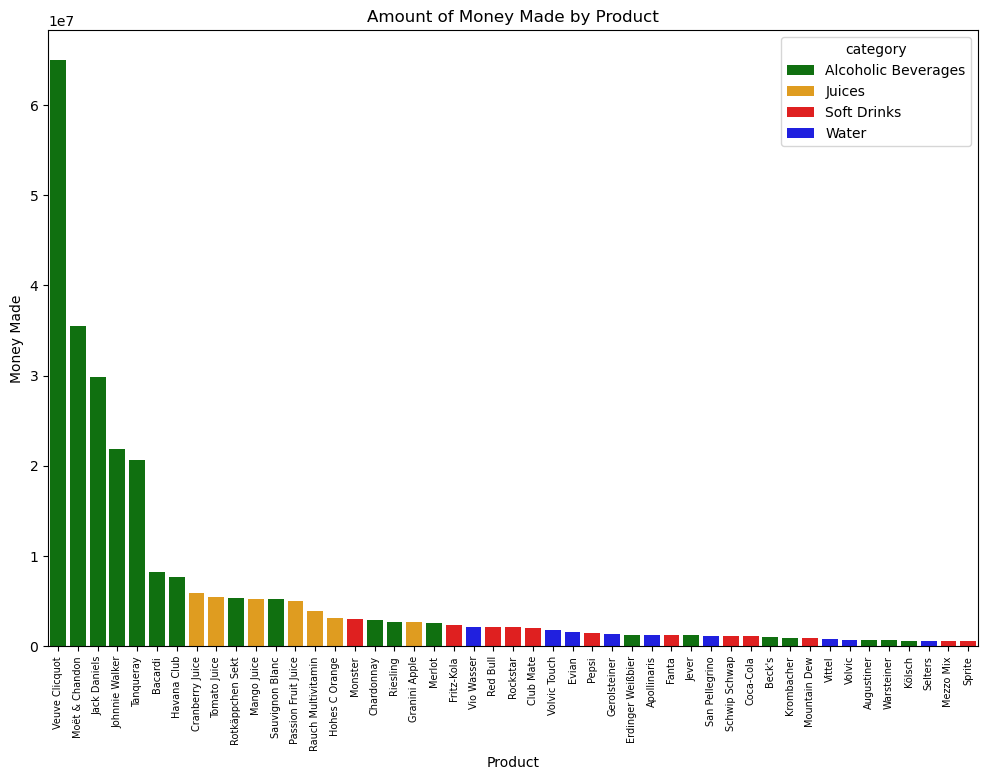

<Figure size 640x480 with 0 Axes>

In [54]:
product_total_price_sum = aggregate_df_by_variables(["product", "category"], "total_price", "sum") 
product_total_price_sum.rename(columns={"total_price_sum": "money_made"}, inplace=True)
create_bar_plot(
    title = "Amount of Money Made by Product",
    df = product_total_price_sum,
    x_vals = "product",
    y_vals = "money_made",
    vertical_labels=True
)

The above two figures tells us that individual `Alcohol Beverages` products made the most money with `Juices` following behind. `Alcoholic Beverages` seems to have the largest spread with some products making alot of money and others making little money. This could be due to the price of the individual products which we will investigate later. Before that, we should confirm that `Alcoholic Beverages` make the most money followed by `Juices`.

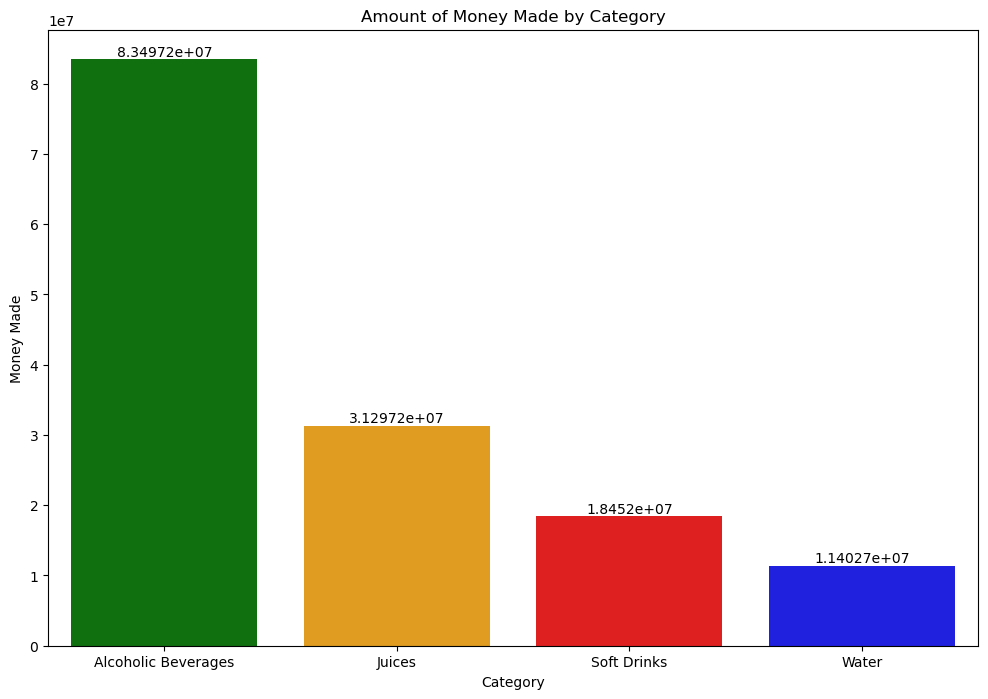

<Figure size 640x480 with 0 Axes>

In [58]:
product_total_price_sum_no_outliers = product_total_price_sum[product_total_price_sum.money_made < 25000000]
category_total_price_sum = aggregate_df_by_variables(["category"], "money_made", "sum", dframe=product_total_price_sum_no_outliers) 
category_total_price_sum.rename(columns={"money_made_sum": "money_made"}, inplace=True)
create_bar_plot(
    title = "Amount of Money Made by Category",
    df = category_total_price_sum,
    x_vals = "category",
    y_vals = "money_made",
    bar_labels = True
)

The above figure confirms that `Alcoholic Beverages` make the most money followed by `Juices`. We can now see if the reason for this is the `unit_price` of individual products.

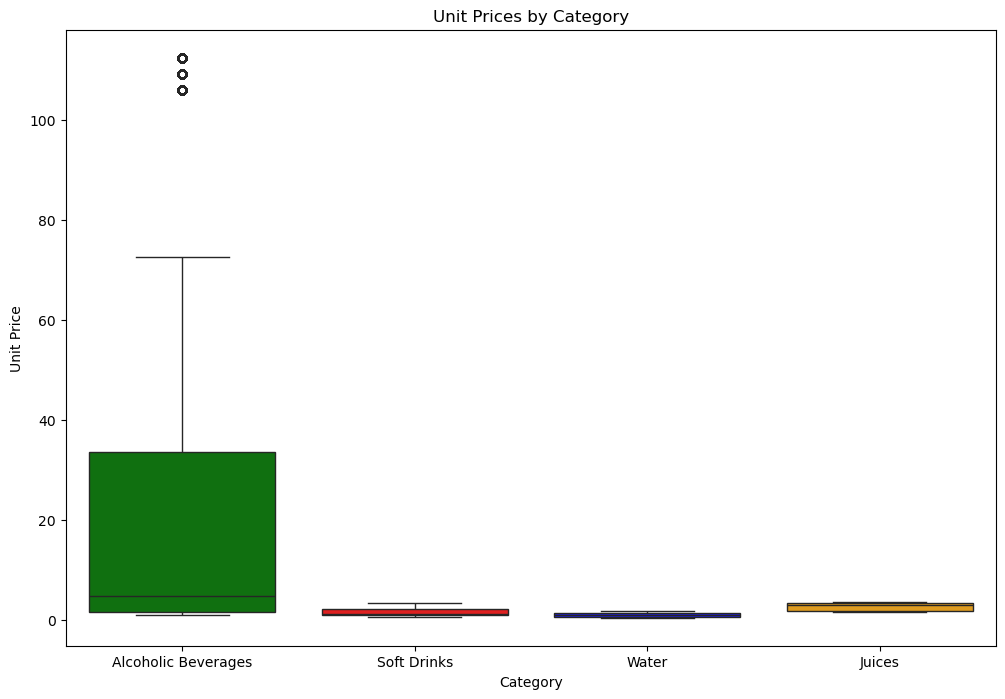

<Figure size 640x480 with 0 Axes>

In [100]:
plt.figure(figsize=(12,8))
sns.boxplot(
    data = beverage_sales,
    x = "category",
    y = "unit_price",
    hue = "category",
    palette = category_colors
)

plt.title("Unit Prices by Category")
plt.xlabel("Category")
plt.ylabel("Unit Price")
plt.show()
plt.clf()

The figure above confirms that `Alcoholic Beverages` have the highest median `unit_price` with the most variance and three outliers. The other import insight this graph tells us is that `juices` are generally more expensive than both `Water` and `Soft Drinks`. Therefore, this demonstrates that products tend to make more money when their prices are higher, which is somewhat independent of their sales.

Therefore, if a business was attempting to create a new product, I would recommend that the product be either an alcoholic beverage or a juice since `Alocholic Beverages` and `Juices` tend to make more money due to thier higher prices. If the business wanted to create a new alcohol product because they make the most money, it is important to note that `Alcoholic Beverages` generally has the widest spread. Therefore, a new juice product has less risk but also less potential compared to a new alcoholic beverege. Moreover, a new juice product has the advantage of being in a less competitive market than a new alcohol product.

We will now attempt to provide insights into the following question:

- What is the ideal time of the year for a business to release a new beverage product?

We can investigate this question by looking at the amount of sales in each month, which we will do now.

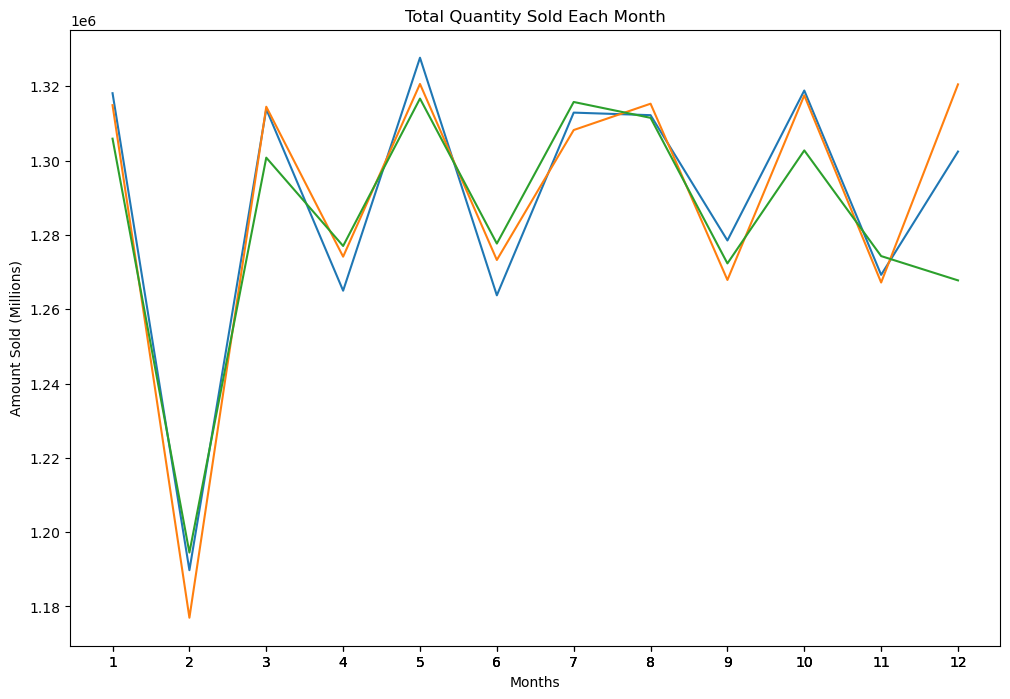

In [106]:
quantity_sales_by_month_year = aggregate_df_by_variables(["month", "year"], "quantity", "sum")
plt.figure(figsize=(12,8))
ax = plt.subplot()
for year in [2021, 2022, 2023]:
    df = quantity_sales_by_month_year.loc[quantity_sales_by_month_year.year == year]
    sns.lineplot(data=df, x="month", y="quantity_sum")

plt.title("Total Quantity Sold Each Month")
plt.xlabel("Months")
plt.ylabel("Amount Sold (Millions)")

ax.set_xticks(quantity_sales_by_month_year.month)
plt.show()

We can see that there is a drop off in amount of sales in February. However, this is likely due to there being less days in February. Other than that, there is no noticable month when sales significantly increase or decrease. It could be a possibility that this is different for the product categories. Therefore, we can now investigate this.

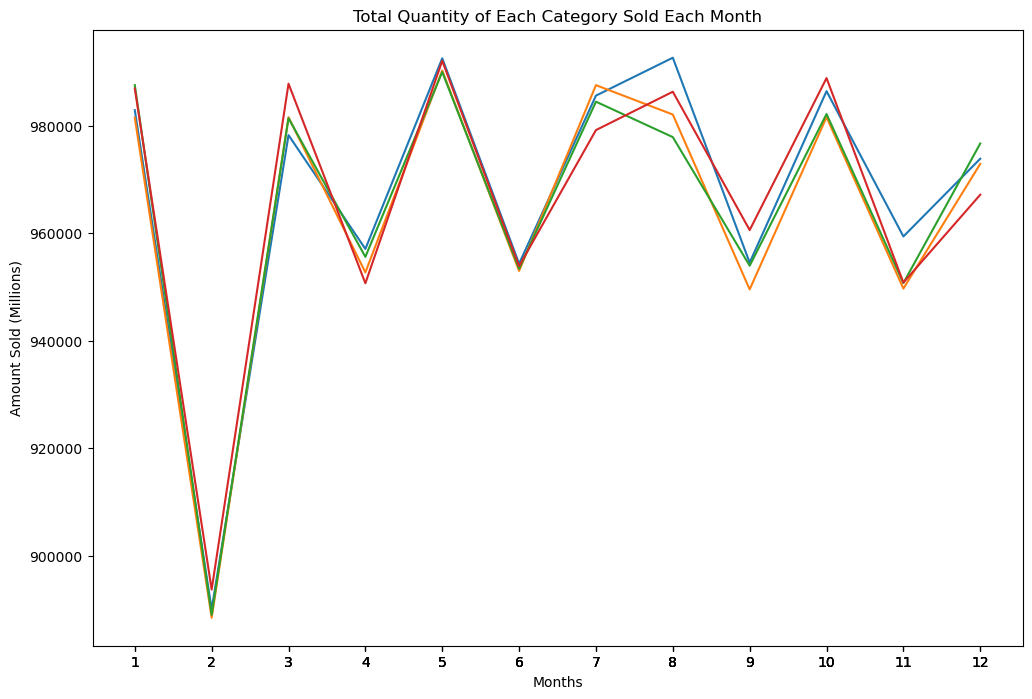

In [108]:
quantity_sales_by_month_year = aggregate_df_by_variables(["month", "category"], "quantity", "sum")
plt.figure(figsize=(12,8))
ax = plt.subplot()
for category in beverage_sales["category"].unique():
    df = quantity_sales_by_month_year.loc[quantity_sales_by_month_year.category == category]
    sns.lineplot(data=df, x="month", y="quantity_sum")

plt.title("Total Quantity of Each Category Sold Each Month")
plt.xlabel("Months")
plt.ylabel("Amount Sold (Millions)")

ax.set_xticks(quantity_sales_by_month_year.month)
plt.show()

The lines are very similar to each other, indicating that there is no association between product and sales at different times of the year.
Therefore, there is no ideal time to release a product of any category.

#### Conlcusion

**What are the most popular products and product categories?** <br />
The most popular product is 'Hohes C Orange' while the most popular category is `Alcoholic Beveragages`

**What is the ideal time of the year for a business to release a new beverage product?** <br />
There is no ideal time to release a new beverage product.

**If a business was to come out with a new beverage product, what type of beverage should this product be?** <br />
A new product should be an alcoholic drink or a juice. The juice market is less competitive and less risky. However, the alcohol market is more competitive but has the possibility to make alot more money.

**Limitations** <br />
Limitations of this analysis is that taxes and manufacturing costs are not considered. It is likely true that alcoholic beverages have a high tax and manufacturing costs, which limits thier profits. It could also be true that although the taxes on juice are likely to be low, the manufacturing costs are likely to be higher than water and soft drink.

**Further Analysis** <br />
Further analysis should look into each specific region and conduct the same analysis to see any differences in regions. This would allow a business to tailor the release of a new product to each region. When the product is released, analysis could focus on the correlations between discount, unit price, and quantity sold.